In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

keras framework에서 
- layers :
- losses :

models/
- Model : 

In [28]:
(x_train, _), (x_test, _) = fashion_mnist.load_data() 

x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


y_train이 없는 이유 :   
astype의 용도는?  
float32로 왜 변환했을까?  
255로 왜 나눴을까?  
nomalize란? (그 3개 비교하는거)

모델의 input은 뭘까?

In [29]:
latent_dim = 64 

class AutoEncoder(Model):
  def __init__(self, encoding_dim):
    super(AutoEncoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),                                    
    ]) #인코더는 데이터셋을 784차원에서 latent만큼 압축하는 법을 배우고

    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))                                    
    ]) #디코더는 원본 이미지를 재구성하는 방법을 배운다.

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

super는 뭐야?  
latent_dim의 목적은 뭐야? 왜 latent(잠재) 야?  
Flatten의 목적은 뭐야?  
Dense는 뭐야?  
  
왜 encoder에는 relu로 코딩해?  
Flatten을 거치면 어떻게 되는거야?  # 2차원의 img를 1차원으로 압축해줌
Dense를 거치면 어찌되는거야?  (안에 argument는?)  : #densely connected layer를 만들어줌 64개만큼
  

decoder는 Dense에서 unit으로 784가 왜 나왔으며 sigmoid를 사용하는걸까? Dense를 거치고 reshape이 들어가기 전 output은 뭘까?  
Reshape의 목적은 뭘까? : 원본 이미지가 28 x 28이므로 



In [30]:
  auto_encoder = AutoEncoder(latent_dim)

In [31]:
auto_encoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

컴파일? :  
왜 아담을 썼을까? :  
MSE는 뭐야? :  

In [32]:
auto_encoder.fit(x_train, x_train, #x_train을 입력과 대상으로 하여 훈련
                 epochs = 10,
                 shuffle=True,
                 validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0393 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0124 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.008

fit은 뭐하는애야? fit 말고 비슷한건 없어?  
loss :   
val_loss:  
의미는 뭐야?  
  

+ 텐서보드로 시각화 해볼 생각 없어?  

In [33]:
encoded_imgs = auto_encoder.encoder(x_test).numpy() 
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()

저기서 왜 넘파이 변환을 했을까?  
이미 인스턴스화 된 애들인데, 이미지를 저런식으로 넣어준다고?  

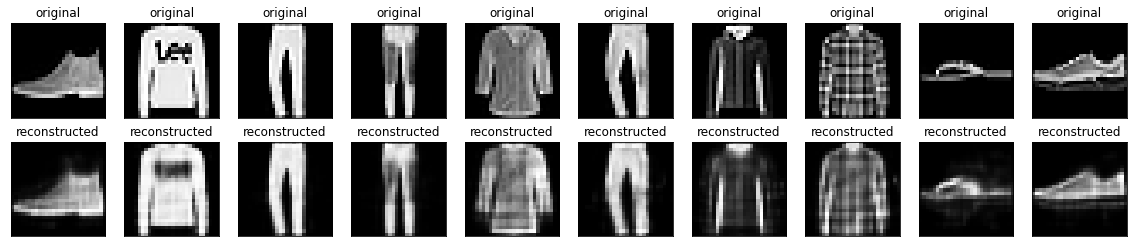

In [34]:
n = 10
plt.figure(figsize= (20,4)) # 아래 출력 그림의 사이즈를 말하는 것일까?
for i in range(n):
  #original img display
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()# 얘를 안하면 어찌될까?
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) #얘도 False 안하면 어찌될까?

  #reconstruction img display
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()# 얘를 안하면 어찌될까?
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False) #얘도 False 안하면 어찌될까?

plt.show()

노이즈가 생겼다.

이 문제를 어